In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('churn.csv')
df.head(10)

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   
5    AL             118        510     391-8027                yes   
6    MA             121        510     355-9993                 no   
7    MO             147        415     329-9001                yes   
8    LA             117        408     335-4719                 no   
9    WV             141        415     330-8173                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   
5              no                      0              223.4               98   
6             yes                     24              218.2               88   
7              no                      0              157.0               79   
8              no                      0              184.5               97   
9             yes                     37              258.6               84   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   
5             37.98  ...              101             18.75   
6             37.09  ...              108             29.62   
7             26.69  ...               94              8.76   
8             31.37  ...               80             29.89   
9             43.96  ...              111             18.87   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   
5                203.9                118                9.18   
6                212.6                118                9.57   
7                211.8                 96                9.53   
8                215.8                 90                9.71   
9                326.4                 97               14.69   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   
5                 6.3                 6               1.70   
6                 7.5                 7               2.03   
7                 7.1                 6               1.92   
8                 8.7                 4               2.35   
9                11.2                 5               3.02   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  
5                       0  False  
6           

In [4]:
#Lets check the shape
df.shape

(3333, 21)

In [5]:
#Lets check the data types
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [6]:
#Lets drop some not relevent columns
df.drop(['state','phone number'],axis=1,inplace=True)

In [7]:
#Lets convert yes to no for international plan and voice mail plan..
international_plan = df['international plan'].replace("yes",1)

In [8]:
international_plan = international_plan.replace("no",0)

In [9]:
voice_mail_plan = df['voice mail plan'].replace("yes",1)

In [10]:
voice_mail_plan = voice_mail_plan.replace("no",0)

In [11]:
df.drop(['international plan','voice mail plan'],inplace=True,axis=1)

In [12]:
df = pd.concat([df,international_plan,voice_mail_plan],axis=1)

In [13]:
df.head(10)

account length  area code  number vmail messages  total day minutes  \
0             128        415                     25              265.1   
1             107        415                     26              161.6   
2             137        415                      0              243.4   
3              84        408                      0              299.4   
4              75        415                      0              166.7   
5             118        510                      0              223.4   
6             121        510                     24              218.2   
7             147        415                      0              157.0   
8             117        408                      0              184.5   
9             141        415                     37              258.6   

   total day calls  total day charge  total eve minutes  total eve calls  \
0              110             45.07              197.4               99   
1              123             27.47              195.5              103   
2              114             41.38              121.2              110   
3               71             50.90               61.9               88   
4              113             28.34              148.3              122   
5               98             37.98              220.6              101   
6               88             37.09              348.5              108   
7               79             26.69              103.1               94   
8               97             31.37              351.6               80   
9               84             43.96              222.0              111   

   total eve charge  total night minutes  total night calls  \
0             16.78                244.7                 91   
1             16.62                254.4                103   
2             10.30                162.6                104   
3              5.26                196.9                 89   
4             12.61                186.9                121   
5             18.75                203.9                118   
6             29.62                212.6                118   
7              8.76                211.8                 96   
8             29.89                215.8                 90   
9             18.87                326.4                 97   

   total night charge  total intl minutes  total intl calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   
5                9.18                 6.3                 6   
6                9.57                 7.5                 7   
7                9.53                 7.1                 6   
8                9.71                 8.7                 4   
9               14.69                11.2                 5   

   total intl charge  customer service calls  churn  international plan  \
0               2.70                       1  False                   0   
1               3.70                       1  False                   0   
2               3.29                       0  False                   0   
3               1.78                       2  False                   1   
4               2.73                       3  False                   1   
5               1.70                       0  False                   1   
6               2.03                       3  False                   0   
7               1.92                       0  False                   1   
8               2.35                       1  False                   0   
9               3.02                       0  False                   1   

   voice mail plan  
0                1  
1                1  
2                0  
3                0  
4                0  
5          

In [14]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [15]:
#Lets convert boolean column into 0 and 1
df['churn'] = df['churn']*1

In [18]:
df.head(15)

account length  area code  number vmail messages  total day minutes  \
0              128        415                     25              265.1   
1              107        415                     26              161.6   
2              137        415                      0              243.4   
3               84        408                      0              299.4   
4               75        415                      0              166.7   
5              118        510                      0              223.4   
6              121        510                     24              218.2   
7              147        415                      0              157.0   
8              117        408                      0              184.5   
9              141        415                     37              258.6   
10              65        415                      0              129.1   
11              74        415                      0              187.7   
12             168        408                      0              128.8   
13              95        510                      0              156.6   
14              62        415                      0              120.7   

    total day calls  total day charge  total eve minutes  total eve calls  \
0               110             45.07              197.4               99   
1               123             27.47              195.5              103   
2               114             41.38              121.2              110   
3                71             50.90               61.9               88   
4               113             28.34              148.3              122   
5                98             37.98              220.6              101   
6                88             37.09              348.5              108   
7                79             26.69              103.1               94   
8                97             31.37              351.6               80   
9                84             43.96              222.0              111   
10              137             21.95              228.5               83   
11              127             31.91              163.4              148   
12               96             21.90              104.9               71   
13               88             26.62              247.6               75   
14               70             20.52              307.2               76   

    total eve charge  total night minutes  total night calls  \
0              16.78                244.7                 91   
1              16.62                254.4                103   
2              10.30                162.6                104   
3               5.26                196.9                 89   
4              12.61                186.9                121   
5              18.75                203.9                118   
6              29.62                212.6                118   
7               8.76                211.8                 96   
8              29.89                215.8                 90   
9              18.87                326.4                 97   
10             19.42                208.8                111   
11             13.89                196.0                 94   
12              8.92                141.1                128   
13             21.05                192.3                115   
14             26.11                203.0                 99   

    total night charge  total intl minutes  total intl calls  \
0                11.01                10.0                 3   
1                11.45                13.7                 3   
2                 7.32                12.2                 5   
3                 8.86                 6.6                 7   
4                 8.41                10.1                 3   
5                 9.18                 6.3                 6   
6                 9.57                 7.5                 7   
7                 9.53           

In [19]:
#Final check wth all columns with datatypes
df.dtypes

account length              int64
area code                   int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int32
international plan          int64
voice mail plan             int64
dtype: object

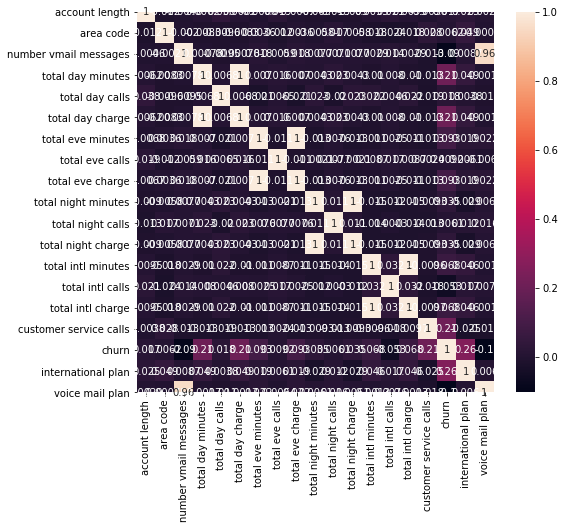

In [20]:
#lets check the correlation of the columns by heatmap
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True)
plt.show()
#after checking we can see that 1 value is completely diagonal 
#so the heatmap shows columns are completely correlated with each other.

In [22]:
#Lets check with the null values
df.isnull().sum()

account length            0
area code                 0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
international plan        0
voice mail plan           0
dtype: int64

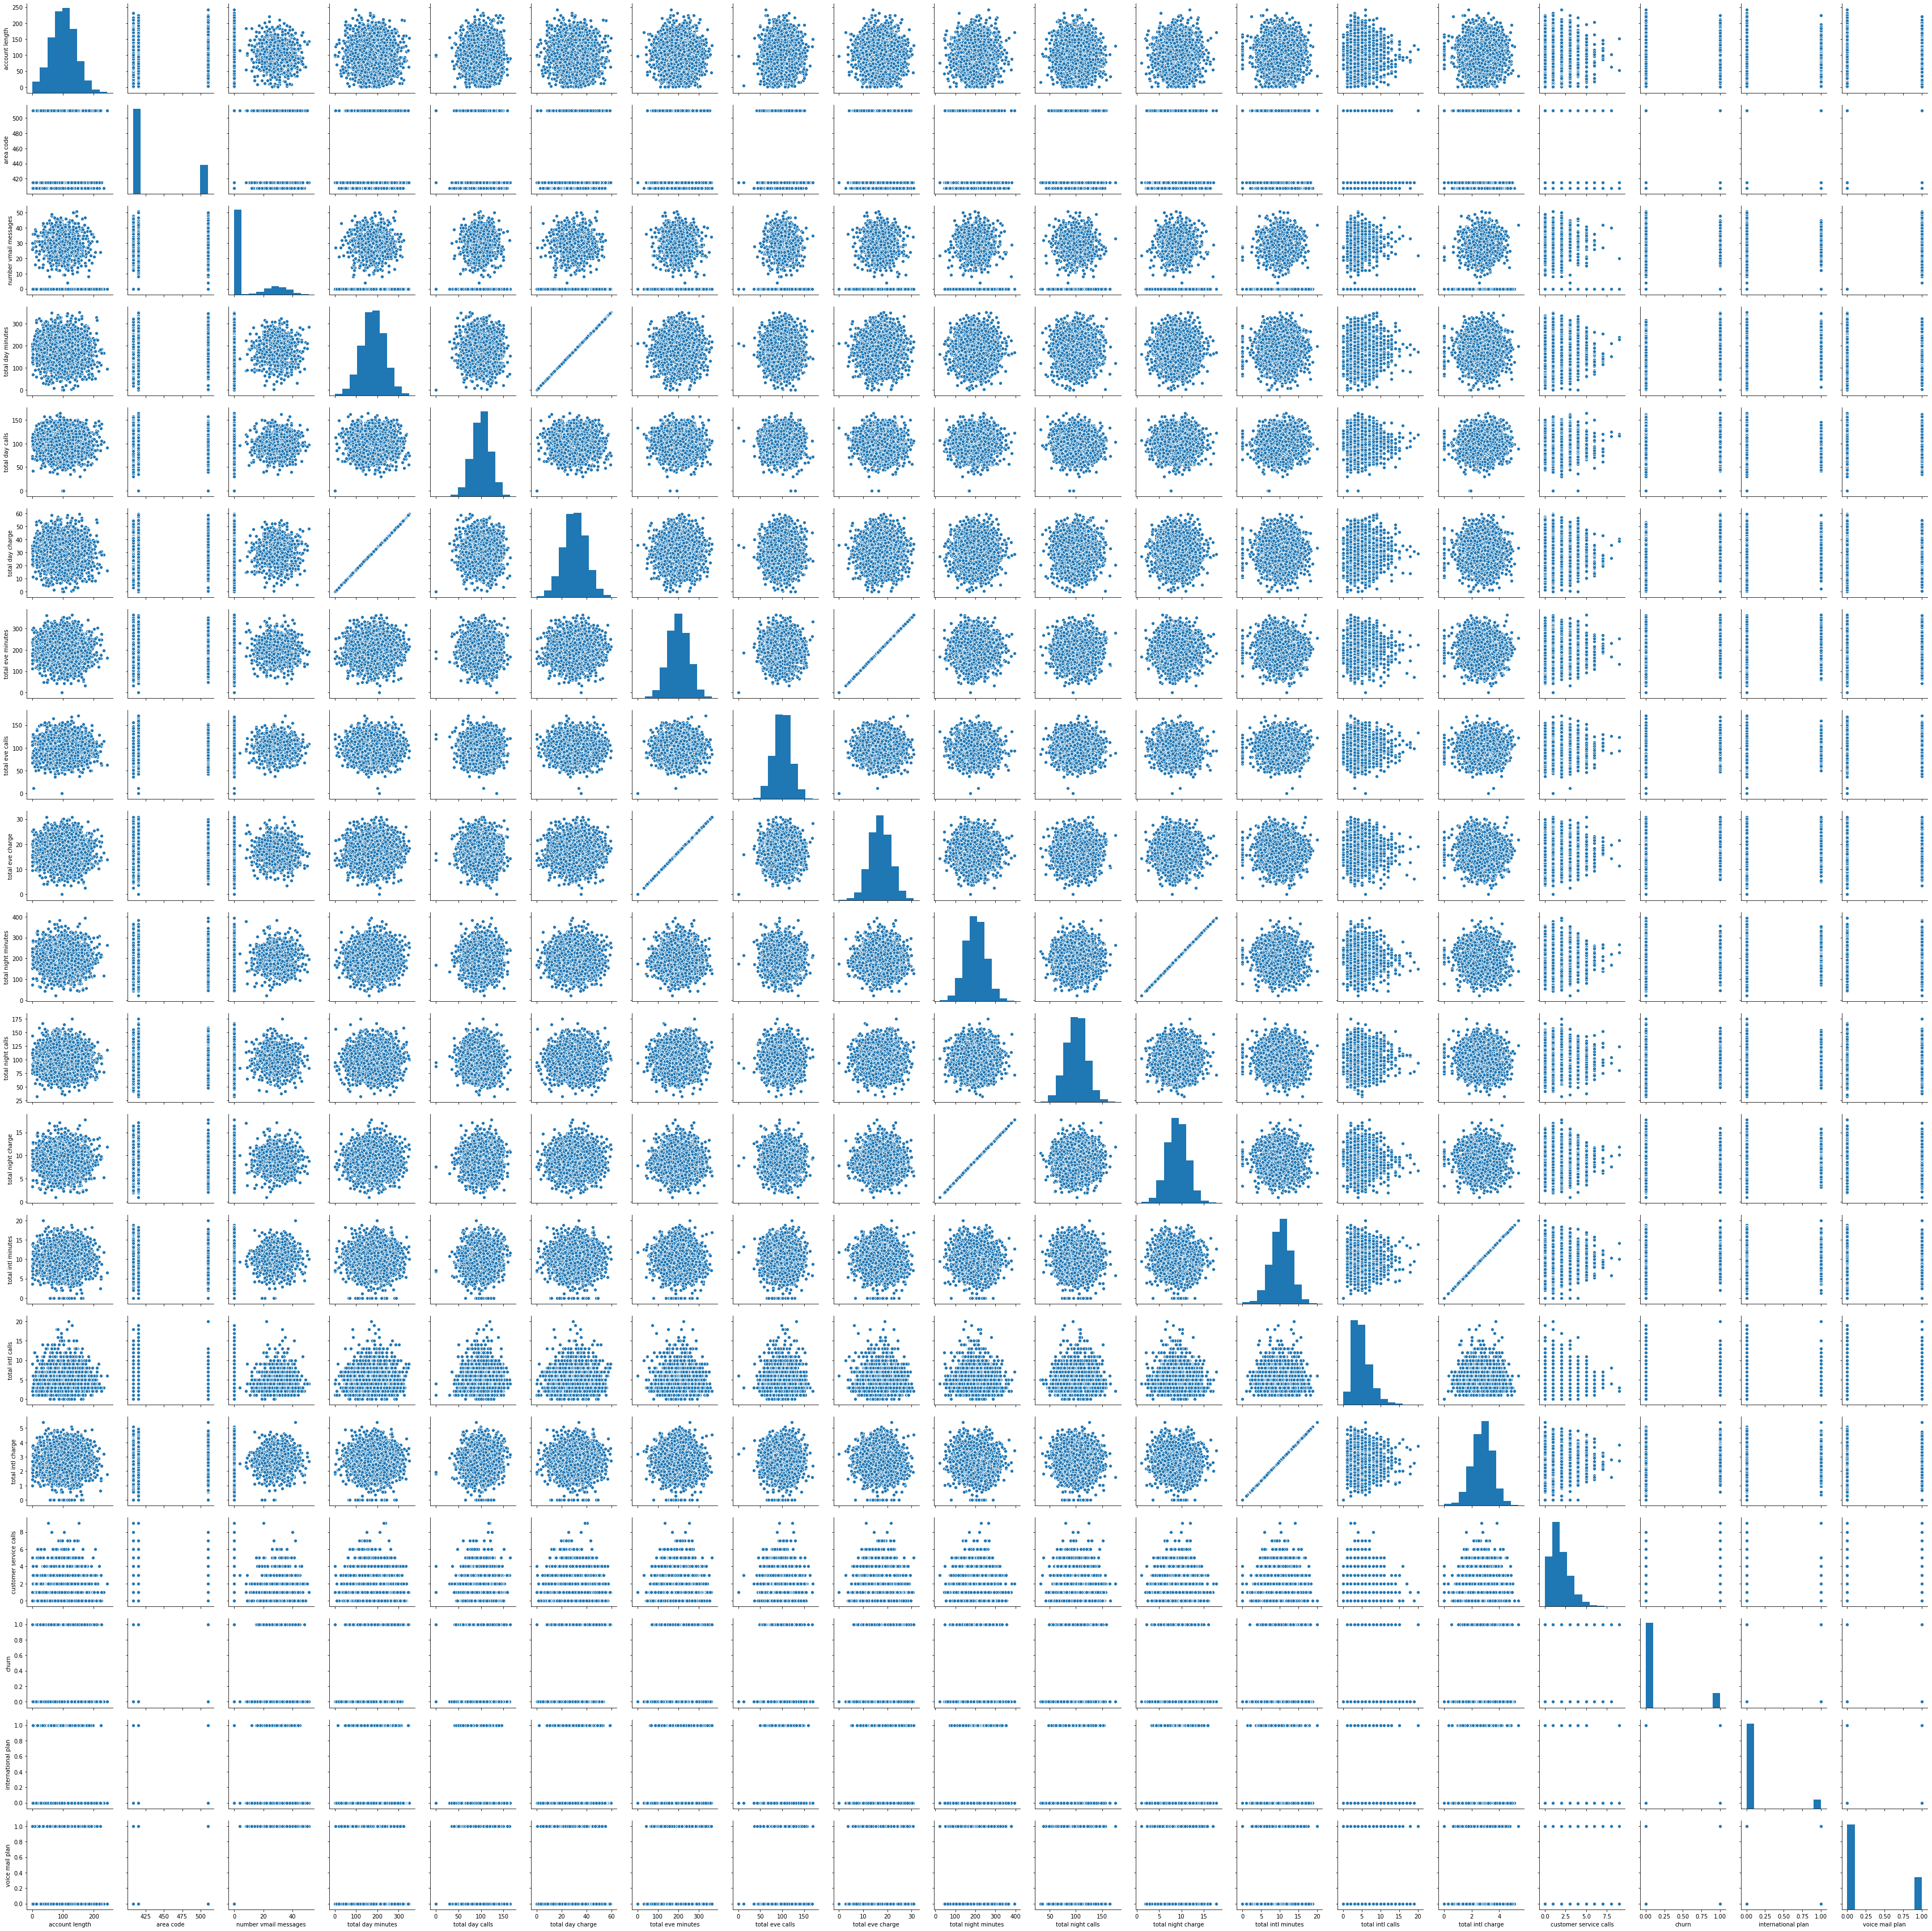

In [23]:
#Lets check out some scatter plots as well
sns.pairplot(df)

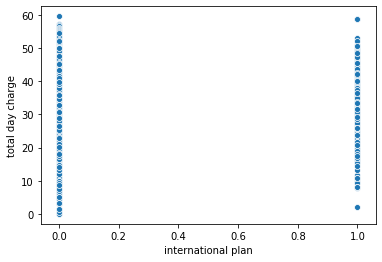

In [25]:
#Lets check the international plan with the total day charge
sns.scatterplot(x='international plan',y='total day charge',data=df)
plt.show()

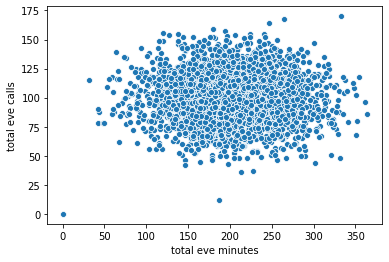

In [26]:
#Lets check the total eve minutes with the total eve calls
sns.scatterplot(x='total eve minutes',y='total eve calls',data=df)
plt.show()

In [29]:
#lets separate x and y
x = df.drop(columns=["churn"],axis=1)
y = df[["churn"]]

In [30]:
#lets split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [31]:
print(x_train.shape,x_test.shape)

(2333, 18) (1000, 18)


In [32]:
print(y_train.shape,y_test.shape)

(2333, 1) (1000, 1)


In [33]:
#now we will check for the Outliers and remove it for a better results
from scipy.stats import zscore
z_score = abs(zscore(df))
print(df.shape)
df_final = df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(3333, 19)
(2860, 19)


In [34]:
#lets create an objects for the models
KNN = KNeighborsClassifier(n_neighbors=6)
SV = SVC()
LR = LogisticRegression()
DT = DecisionTreeClassifier(random_state=6)
GNB = GaussianNB()

In [35]:
models = []
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [36]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,auc,roc_curve

In [37]:
from sklearn.model_selection import cross_val_score

*************************** KNeighborsClassifier *******************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy Score 0.879


cross_val_score =  0.8760838682994372


roc_auc_curve 0.5914884415467846


classification_report               precision    recall  f1-score   support

           0       0.88      0.99      0.93       857
           1       0.84      0.19      0.31       143

    accuracy                           0.88      1000
   macro avg       0.86      0.59      0.62      1000
weighted avg       0.87      0.88      0.84      1000



[[852   5]
 [116  27]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*************************** SVC *******************************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf

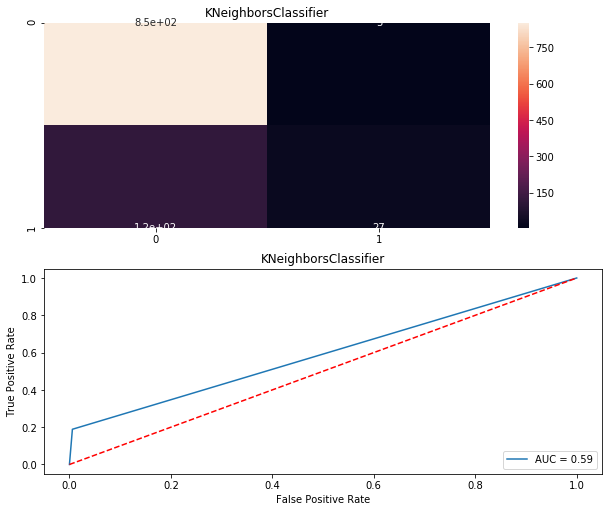

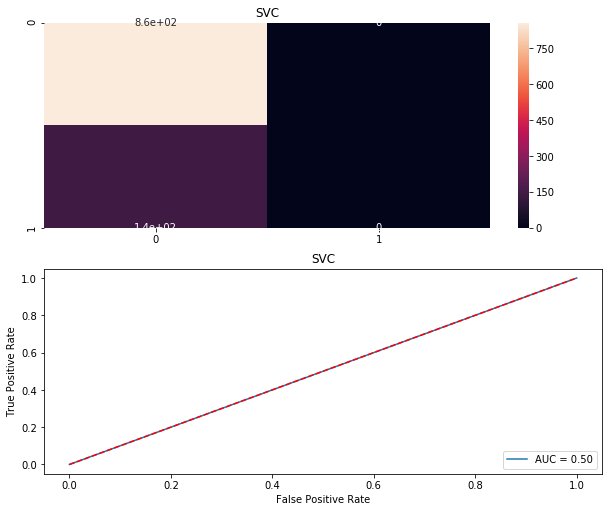

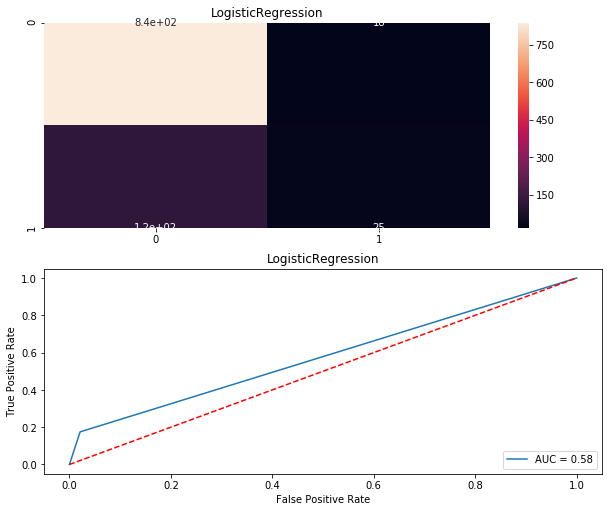

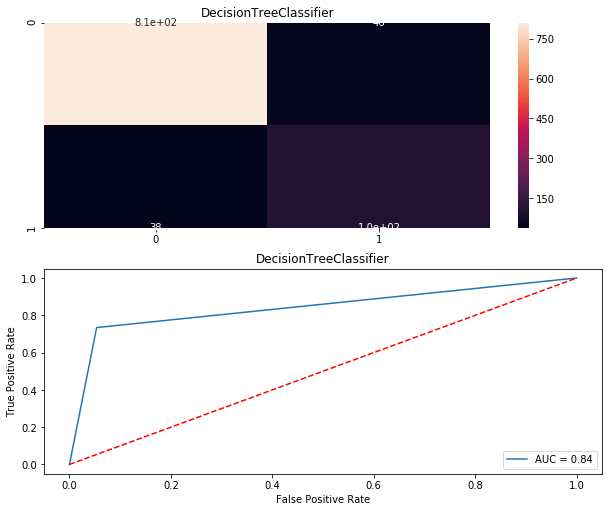

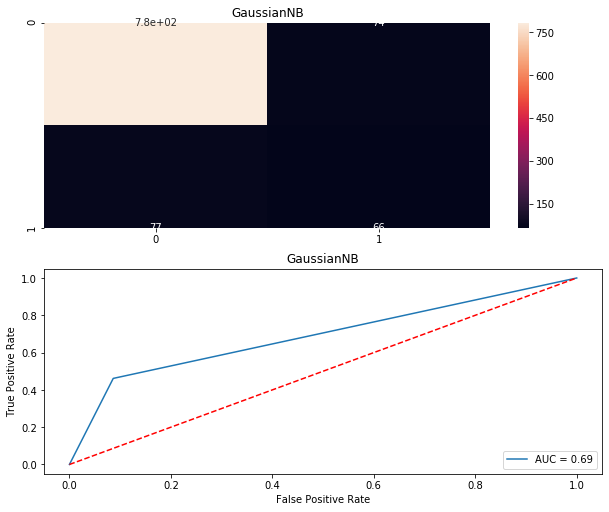

In [38]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('***************************',name,'*******************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre = model.predict(x_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print('Accuracy Score',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('cross_val_score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    print('roc_auc_curve',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report',classification_report(y_test,pre))
    print('\n')
    cm = confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label = 'AUC = %0.2f' %roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print('\n\n')

In [39]:
result = pd.DataFrame({'Model':Model ,'Accuracy_score':score, 'Cross val Score':cvs ,'Roc auc curve':rocscore})
result

Model  Accuracy_score  Cross val Score  Roc auc curve
0    KNeighborsClassifier            87.9        87.608387      59.148844
1                     SVC            85.7        85.508712      50.000000
2      LogisticRegression            86.4        85.988384      57.691084
3  DecisionTreeClassifier            91.6        92.139775      84.029506
4              GaussianNB            84.9        86.469404      68.759537

In [40]:
#we will go ahead with Decision Tree Classifier as it shows maximum accuracy

In [41]:
from sklearn.externals import joblib

In [43]:
joblib.dump(DT , 'model_churn.pkl')

['model_churn.pkl']

In [44]:
model.predict(x_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,